## Hausarbeit - Abgabe 3 - Aufgabe 1
• Implementieren Sie das in der Vorlesung gezeigte “Gradient Descent” 
Beispiel in numpy

• Implementieren Sie eine Ausgleichsgerade mit dem Verfahren der 
kleinsten Quadrate für die in der Vorlesung gezeigten Daten
### Laden der nötigen Bibliotheken

In [184]:
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt 

### 1. Aufgabe:
Implementieren Sie das in der Vorlesung gezeigte “Gradient Descent” 
Beispiel in numpy

In [185]:
### Gradient Descent: 

# 1.Schritt: Einlesen der Daten: 
values = np.loadtxt('vl5_data.csv')

# 2.Schritt: Aufteilen der Daten in die gegebenen Einheiten
t_u = np.array(values[:,1])   # temperature in Celsius
t_c = np.array(values[:,0])   # unknown units

In [186]:
# 3.Schritt: Definition der Funktionen
def model(t_u, w, b):
    return w * t_u + b

In [187]:
# 4.Schritt: Definition der Ableitungen
### DERIVATIVES ###
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / np.size(t_p, 0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [188]:
# 5.Schritt: Berechnung des Gradientens und des Training Loops
## Definition Gradient
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return np.stack([dloss_dw.sum(), dloss_db.sum()])

## Definition Training Loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):

        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad

        # Ausgabe der einzelnen Epochen
        # print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [189]:
# 6.Schritt: Durchführung der Berechnung der Parameter für die Gerade
# Normierung der Werte t_u
t_un = 0.1 * t_u


params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = np.array([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

params

# Berechnung des Models
t_p = model(t_un, *params)

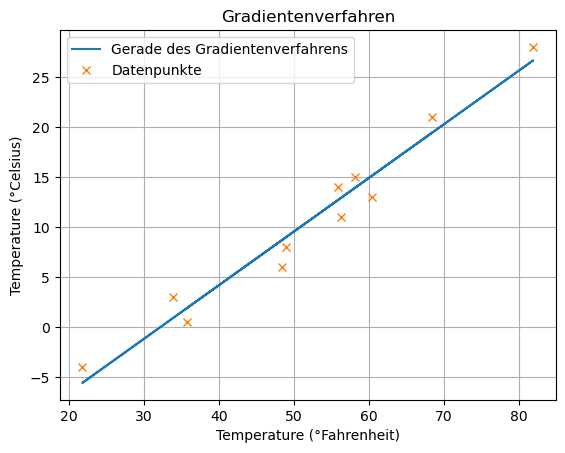

In [190]:
# 7.Schritt: Darstellung der Geraden zusammen mit den Daten
fig = plt.figure()
plt.plot(t_u, t_p, label = "Gerade des Gradientenverfahrens")
plt.plot(t_u, t_c, 'x', label = "Datenpunkte")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title("Gradientenverfahren")
plt.legend()
plt.grid()

## Hausarbeit - Abgabe 3 - Aufgabe 2

### 2. Aufgabe
Implementieren Sie eine Ausgleichsgerade mit dem Verfahren der 
kleinsten Quadrate für die in der Vorlesung gezeigten Daten

In [191]:
# 1.Schritt: Einlesen der Daten: 
values = np.loadtxt('vl5_data.csv')

# 2.Schritt: Aufteilen der Daten in die gegebenen Einheiten
x = np.array(values[:,1])   # temperature in Celsius
y = np.array(values[:,0])   # unknown units

n = len(x) # Anzahl der Messwerte

In [192]:
# 3.Schritt: Definition des Models für die Regressionsgerade
def model(x, a, b):
    return a * x + b

In [193]:
# 4.Schritt: Definition der Funktionen zur Berechnung der Steigung a der Regressionsgerade und dem Ordinatenabschnitt b der Regressionsgeraden:

def produkt_xi_yi(x, y, n):
    xi_mul_yi = 0
    for i in range(n):
        xi_mul_yi = xi_mul_yi + x[i] * y[i]

    return xi_mul_yi

def produkt_summe_xi_yi(x, y):
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xi_mul_sum_yi = sum_x * sum_y

    return sum_xi_mul_sum_yi

def x_squared(x, n):
    square_x  = 0
    for i in range(n):
        square_x = square_x + x[i]**2

    return square_x

def sum_x_squared(x):
    return np.sum(x)**2

def sum_x_squared_mul_sum_yi(x, y, n):
    squared_x_mul_yi = x_squared(x, n) * np.sum(y)
    return squared_x_mul_yi

def sum_x_mul_sum_xi_yi(x, y):
    sum_mul_xi_yi = np.sum(x) * produkt_xi_yi(x, y, n)
    return sum_mul_xi_yi

#### Funktion zur Berechnung der Steigung der Regressionsgeraden ####
def steigung_regressionsgerade(x,y,n):
    term_1 = produkt_xi_yi(x, y, n)
    term_2 = produkt_summe_xi_yi(x, y)
    term_3 = n * x_squared(x, n)
    term_4 = sum_x_squared(x)

    a = (n*term_1 - term_2) / (term_3 - term_4)
    return a

#### Funktion zur Berechnung des Ordinatenabschnitts der Regressionsgeraden ####
def ordinatenabschnitt_regressionsgerade(x, y, n):
    term_1 = sum_x_squared_mul_sum_yi(x, y, n)
    term_2 = sum_x_mul_sum_xi_yi(x, y)
    term_3 = n*x_squared(x, n)
    term_4 = sum_x_squared(x)
    
    b = (term_1 - term_2) / (term_3 - term_4)
    return b 

In [194]:
# 5. Schritt: Berechnung der Ausgleichsgeraden

a = steigung_regressionsgerade(x, y, n)
print('Die Steigung der Regressionsgeraden a ist:', a)

b = ordinatenabschnitt_regressionsgerade(x, y, n)
print('Der Ordinatenabschnitt der Regressionsgeraden b ist:', b)

# Implementierung der Regressionsgeraden
regressionsgerade = model(x, a, b)

Die Steigung der Regressionsgeraden a ist: 0.5367719209075427
Der Ordinatenabschnitt der Regressionsgeraden b ist: -17.304785503010716


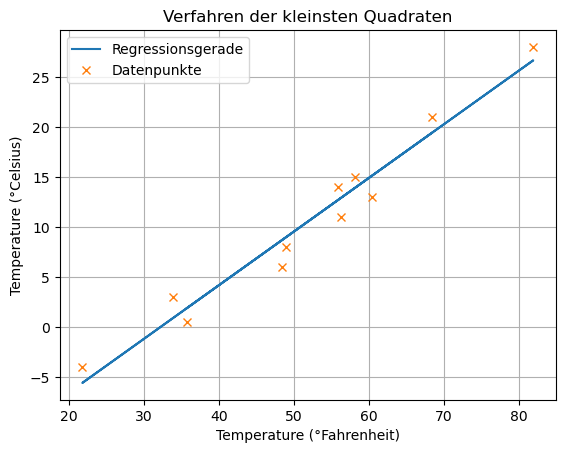

In [195]:
# 6.Schritt: Darstellung der Geraden zusammen mit den Daten
fig = plt.figure()
plt.plot(x, regressionsgerade, label="Regressionsgerade")
plt.plot(x, y, 'x', label="Datenpunkte")
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.title("Verfahren der kleinsten Quadraten")
plt.legend()
plt.grid()
